## Proyecto TSFC: Oscilaciones en Sistemas Biológicos

## Comportamiento de Testosterona

### Hernández de la Vega Alejandro
### Rodríguez Rosenblueth César Daniel
### Santiago Santos Eva Yazmín 

Para una primera aproximación se utiliza el siguiente modelo:

$$ \frac{dR}{dt} = f(T)-b_{1}R$$
$$ \frac{dL}{dt} = g_{1}R-b_{2}L $$
$$ \frac{dT}{dt} = g_{2}L-b_{3}T $$

donde $b_{1}$, $b_{2}$, $b_{3}$, $g_{1}$, $g_{2}$ son parámetros positivos.


Alrededor del punto de equilibrio se tiene:

$$ \frac{dx}{dt} = f'(T_{0})z(t) - b_{1}x(t) $$
$$ \frac{dy}{dt} = g_{1}x(t) - b_{2}y(t) $$
$$ \frac{dz}{dt} = g_{2}y(t-\tau)-b_{3}z(t) $$

Donde
$$ z(t)=T(t)-T_{0} $$
$$ y(t)=L(t)-L_{0} $$
$$ x(t)=R(t)-R_{0} $$

### Notas
Hay que revisar lso valroes que da el artículo para K, son a partir de los cuales se encuentran las constantes de equilibrio para las tres funciones. Adicionalmente están dados en términos de las otras cinco variables de propocionalidad de la ecuación. 

De igual manera falta entender bien el valor de 'p' o 'm' (valor en el artículo y valor en el libro.)

Agregar las descripciones biológicas de L,T y R

In [2]:
using PyPlot
using TaylorSeries

In [3]:
function h_find(x::Array,p::Int)
    h1 = (1/10)*(eps(1.0)/abs(x[p+1]))^(1/p)
    h2 = (1/10)*(eps(1.0)/abs(x[p]))^(1/(p-1))
    if h1 - h2 >= 0
        return h2
    else
        return h1
    end
end

h_find (generic function with 1 method)

In [4]:
evaluate(Taylor1([5,1],10),2)

7

In [5]:
Taylor1(2,2)

 2 + 𝒪(t³)

In [6]:
exp(ans)

 7.38905609893065 + 𝒪(t³)

In [7]:
function Testosterone1(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    A=2
    K=1
    m=12
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Testosterone1 (generic function with 1 method)

In [20]:
Testosterone1(1.0,2.0,3.0,5,0.0,10.0);

In [9]:
t=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[1];
R=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[2];
L=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[3];
T=Testosterone1(1.0,2.0,3.0,5,0.0,10.0)[4];

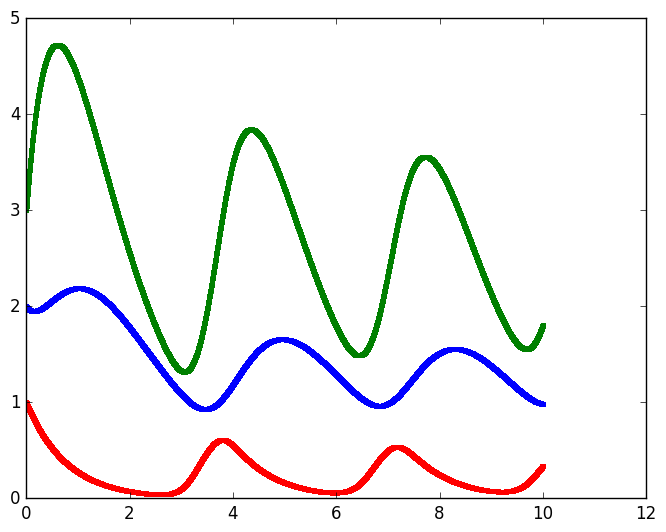

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001CBB9BE0>

In [10]:
plot(t,R,"r.")
plot(t,T, "b.")
plot(t,L, "g.")

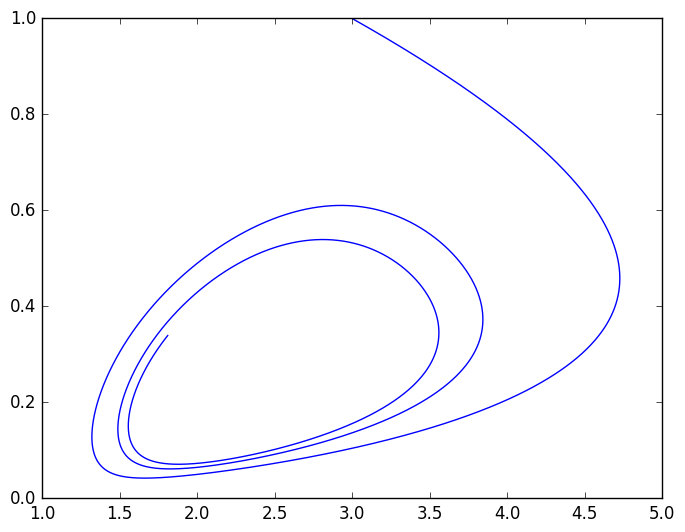

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001CC9ED30>

In [11]:
plot(L,R)

In [35]:
function Castration(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.0
    A=2
    K=1
    m=12
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        for i in range(1,p)
            fT=A/(K+TT^m)
            RT.coeffs[i+1] = fT.coeffs[i]-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Castration (generic function with 1 method)

In [36]:
t_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[1];
R_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[2];
L_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[3];
T_castration=Castration(1.0,2.0,3.0,5,0.0,10.0)[4];

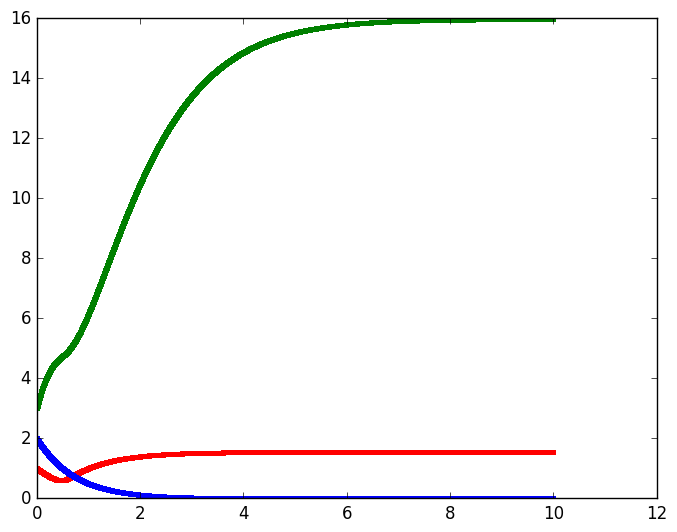

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001A31FFD0>

In [37]:
plot(t_castration,R_castration,"r.")
plot(t_castration,T_castration, "b.")
plot(t_castration,L_castration, "g.")

Curiosamente se utiliza el mismo tipo de ecuación para describir la ezquisofrenia catatónica periódica. Cronin (1973,1976) propuso:

$$
f(t) = (c-ht)(1-H(t-c/h))
$$

Donde H(z) es la función de Heaveside y c,h son constantes.

In [12]:
#Heaviside
function H(x)
    if x>0
        return 1
    else
        return 0
    end
end

H (generic function with 1 method)

In [18]:
H(0)

0

In [22]:
function f_schizophrenia(c,h,t)
    (c-h*t)*(1-H(t-c/h))
end

f_schizophrenia (generic function with 1 method)

In [81]:
function Schizophrenia(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Schizophrenia (generic function with 1 method)

In [82]:
t_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[1];
R_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[2];
L_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[3];
T_s=Schizophrenia(1.0,2.0,3.0,5,0.0,10.0)[4];

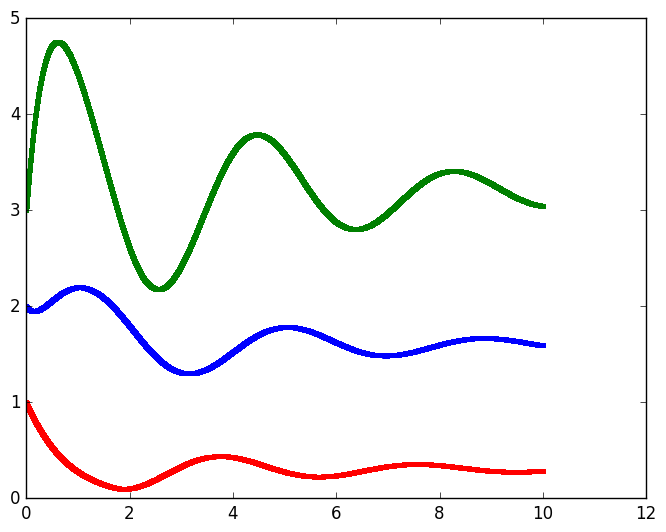

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000023B042B0>

In [83]:
plot(t_s,R_s,"r.")
plot(t_s,T_s, "b.")
plot(t_s,L_s, "g.")

In [92]:
function Schizophrenia_Pituitary_Repression(R0::Number,T0::Number,L0::Number,p::Number,t0::Number,tf::Number)
    b1=1.29
    b2=0.97
    b3=1.39
    
    g1=10
    g2=0.7
    
    c=2
    h_f=1
    
    t=[t0]
    R=[R0]
    L=[L0]
    T=[T0]
    
    Wt=c*b3/h_f-0.5
    while t0 < tf
        RT=Taylor1(R0,p)
        LT=Taylor1(L0,p)
        TT=Taylor1(T0,p)
        fT=Taylor1(f_schizophrenia(c,h_f,T0),p)
        WtT=Taylor1(Wt,p)
        for i in range(1,p)
            RT.coeffs[i+1] = fT.coeffs[i]/i-b1*RT.coeffs[i]/i
            LT.coeffs[i+1] = g1*RT.coeffs[i]/i-b2*LT.coeffs[i]/i
            TT.coeffs[i+1] = g2*LT.coeffs[i]/i-b3*TT.coeffs[i]/i+WtT.coeffs[i]/i
        end
        hR=h_find(RT.coeffs,p)
        hL=h_find(LT.coeffs,p)
        hT=h_find(TT.coeffs,p)
        h=minimum([hR,hL,hT])
        t0=t0+h
        R0=evaluate(RT,h)
        L0=evaluate(LT,h)
        T0=evaluate(TT,h)
        push!(t,t0)
        push!(R,R0)
        push!(L,L0)
        push!(T,T0)
    end
    return (t,R,L,T)
end

Schizophrenia_Pituitary_Repression (generic function with 1 method)

In [93]:
Taylor1(2,58)+Taylor1([2,2,2],58)

 4 + 2 t + 2 t² + 𝒪(t⁵⁹)

In [94]:
t_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,10.0)[1];
R_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,10.0)[2];
L_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,10.0)[3];
T_sp=Schizophrenia_Pituitary_Repression(1.0,2.0,3.0,5,0.0,10.0)[4];

Como dice el artículo para valores de $w_{t} > \frac{cb_{3}}{h} $ L y R se van a cero comprobando lo descrito en [2], y para valores menores se tiene una osiclación de esas variables. T por otro lado debe tender al valor de $ \frac{W_{t}}{b_{3}}  $

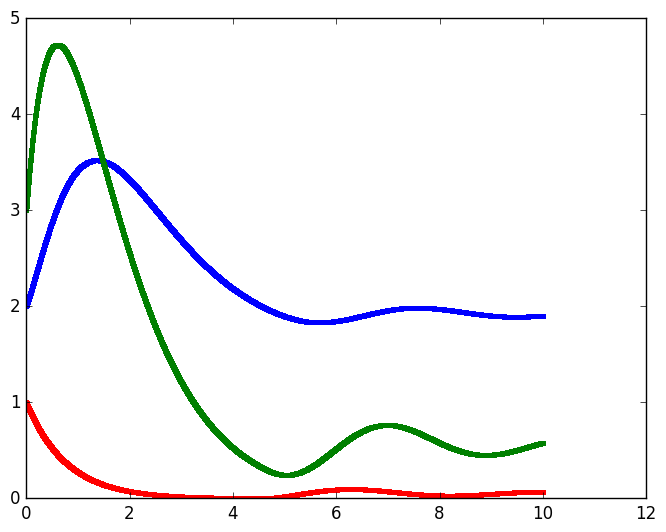

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000025B70AC8>

In [95]:
plot(t_sp,R_sp,"r.")
plot(t_sp,T_sp, "b.")
plot(t_sp,L_sp, "g.")

Referencias:

[1] Murray, J. D. 1989. Mathematical Biology. Volume 19. 

[2] Smith, William R. "Hypothalamic regulation of pituitary secretion of luteinizing hormone—II feedback control of gonadotropin secretion." Bulletin of Mathematical Biology 42.1 (1980): 57-78.